In [1]:
from ipynb.fs.full.config_helper import get_agg_config

import warnings
warnings.filterwarnings("ignore")

In [2]:
NUM_OF_PARTIES = 20
ROUNDS = 30
EPOCHS = 6

dataset='femnist'

In [3]:
from ibmfl.aggregator.aggregator import Aggregator

agg_config = get_agg_config(NUM_OF_PARTIES, ROUNDS, EPOCHS)
aggregator = Aggregator(config_dict=agg_config)

aggregator.start()

Yaml configuration file not found: log_config.yaml


2021-06-05T18:31:21.258Z | 1.0.5 | INFO | ibmfl.util.config                                  | Getting Aggregator details from arguments.
2021-06-05T18:31:21.258Z | 1.0.5 | INFO | ibmfl.util.config                                  | No data config provided for this setup.
2021-06-05T18:31:21.259Z | 1.0.5 | INFO | ibmfl.util.config                                  | No metrics recorder config provided for this setup.
2021-06-05T18:31:21.259Z | 1.0.5 | INFO | ibmfl.util.config                                  | No model config provided for this setup.
2021-06-05T18:31:21.624Z | 1.0.5 | INFO | ibmfl.util.config                                  | No data config provided for this setup.
2021-06-05T18:31:21.625Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | RestSender initialized
2021-06-05T18:31:21.626Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.START
2021-06-05T18:31:21.626Z | 1.0.5 | INFO | ibmfl.connection.flask_connection 

2021-06-05T18:32:05.027Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :6
2021-06-05T18:32:05.028Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Adding party with id party13
2021-06-05T18:32:05.029Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of registered parties:13
2021-06-05T18:32:05.030Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:32:05] "POST /6 HTTP/1.1" 200 -
2021-06-05T18:32:08.014Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :6
2021-06-05T18:32:08.015Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Adding party with id party14
2021-06-05T18:32:08.016Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of registered parties:14
2021-06-05T18:32:08.017Z | 1.0.5 | INFO | werkzeug                               

In [4]:
eval_party_acc = [[] for _ in range(NUM_OF_PARTIES)]
eval_party_loss = [[] for _ in range(NUM_OF_PARTIES)]
train_party_acc = [[] for _ in range(NUM_OF_PARTIES)]
train_party_loss = [[] for _ in range(NUM_OF_PARTIES)]
iterations = [[] for _ in range(NUM_OF_PARTIES)]

def get_metrics(metrics):
    keys = list(metrics['party'].keys())
    keys.sort()
    for i in range(len(keys)):
        eval_party_acc[i].append(metrics['party'][keys[i]]['test']['acc'])
        eval_party_loss[i].append(metrics['party'][keys[i]]['test']['loss'])
        train_party_acc[i].extend(metrics['party'][keys[i]]['train']['acc'])
        train_party_loss[i].extend(metrics['party'][keys[i]]['train']['loss'])
        iterations[i].append(metrics['fusion']['curr_round']*agg_config['hyperparams']['local']['training']['epochs'])

mh = aggregator.fusion.metrics_manager
mh.register(get_metrics)


aggregator.start_training()

2021-06-05T18:32:35.923Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating Global Training.
2021-06-05T18:32:35.924Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Warm start disabled.
2021-06-05T18:32:35.925Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model updateNone
2021-06-05T18:32:35.926Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-05T18:32:35.926Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-05T18:32:36.541Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-05T18:32:36.542Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-05T18:32:36.542Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-05T18:32:36.543

2021-06-05T18:34:38.883Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:34:38.960Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:34:38] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:34:38.960Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:34:38] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:34:39.010Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:34:39] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:34:39.066Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:34:39] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:34:39.113Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:34:39] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:34:39.165Z | 1.0.5 | INFO | werkzeug                                         

2021-06-05T18:36:01.100Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:36:01.102Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:36:01.104Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:36:01.122Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:36:01.147Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:36:01] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:36:01.168Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:36:01.195Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:36:01] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:36:01.235Z | 1.0.5 | INFO | werkzeug                

2021-06-05T18:37:23.421Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:37:23.422Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:37:23] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:37:23.423Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:37:23.424Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:37:23.444Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:37:23.493Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:37:23] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:37:23.566Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:37:23] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:37:23.566Z | 1.0.5 

2021-06-05T18:38:51.023Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:38:51.051Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:38:51.059Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:38:51.071Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:38:51.116Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:38:51] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:38:51.117Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:38:51.133Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:38:51.160Z | 1.0.5 | INFO | werkzeug                                           | 127.

2021-06-05T18:40:14.528Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:40:14.540Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:40:14.599Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:40:14.600Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:40:14] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:40:14.641Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:40:14] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:40:14.641Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:40:14.687Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:40:14] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:40:14.724Z | 1.0.5 

2021-06-05T18:41:35.389Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:41:35] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:41:35.390Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:41:35.392Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:41:35.468Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:41:35.469Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:41:35.471Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:41:35] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:41:35.514Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:41:35] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:41:35.516Z | 1.0.5 

2021-06-05T18:42:53.315Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:42:53.407Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:42:53.409Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:42:53] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:42:53.508Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:42:53] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:42:53.543Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:42:53.632Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:42:53] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:42:53.655Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:42:53.658Z | 1.0.5 

2021-06-05T18:44:08.281Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:70
2021-06-05T18:44:08.492Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:44:08.770Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:44:09.437Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:44:09] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:44:09.463Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:44:09] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:44:09.475Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:44:09.990Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:44:09] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:44:10.078Z | 1.0.5 | 

2021-06-05T18:45:22.139Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:45:22] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:45:26.244Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:45:26.884Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:70
2021-06-05T18:45:26.885Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:45:26] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:45:29.316Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:45:29.579Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:45:29] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:45:29.843Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:45:30.270Z | 1.0.5 | 

2021-06-05T18:46:29.751Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:50
2021-06-05T18:46:34.765Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:55
2021-06-05T18:46:39.773Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:60
2021-06-05T18:46:44.782Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:65
2021-06-05T18:46:48.347Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:46:48.878Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:46:48] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:46:49.788Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:70
2021-06-05T18:46:50.906Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request receiv

2021-06-05T18:47:27.391Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-05T18:47:32.395Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-05T18:47:37.399Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-05T18:47:42.404Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:45
2021-06-05T18:47:47.407Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:50
2021-06-05T18:47:52.413Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:55
2021-06-05T18:47:57.427Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:60
2021-06-05T18:48:02.448Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:65
2021-06-05T18:48:07.451Z

2021-06-05T18:48:24.604Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-05T18:48:29.611Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-05T18:48:34.619Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-05T18:48:39.623Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-05T18:48:44.627Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-05T18:48:49.635Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-05T18:48:54.644Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-05T18:48:59.651Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-05T18:49:04.660Z |

2021-06-05T18:49:44.772Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-05T18:49:44.772Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-05T18:49:47.328Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-05T18:49:47.335Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-05T18:49:47.336Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-05T18:49:47.337Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-05T18:49:52.340Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-05T18:49:57.343Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-05

2021-06-05T18:51:07.461Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:80
2021-06-05T18:51:07.462Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-05T18:51:07.463Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-05T18:51:07.463Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-05T18:51:07.517Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f43c6aa5e48>
2021-06-05T18:51:07.518Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-05T18:51:07.519Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-05T18:51:10.853Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | 

2021-06-05T18:52:25.330Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:52:25] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:52:25.352Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:52:25] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:52:25.385Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:52:25] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:52:25.968Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:75
2021-06-05T18:52:25.969Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-05T18:52:25.969Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-05T18:52:25.970Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-05T18:52:26.024Z | 1.0.5 | IN

2021-06-05T18:53:46.862Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:53:46] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:53:46.894Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:53:46] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:53:46.934Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:53:46] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:53:46.974Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:53:46] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:53:47.008Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:53:47] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:53:47.046Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:53:47] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:53:47.084Z | 1.0.5 | INFO | werkzeug        

2021-06-05T18:55:05.957Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:55:05.995Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:55:05.996Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:55:05] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:55:05.998Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:55:06.033Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:55:06] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:55:06.034Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:75
2021-06-05T18:55:06.072Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:55:06] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:55:06.112Z | 1.0.5 | 

2021-06-05T18:56:29.653Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:56:29.655Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:56:29.655Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:56:29.657Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:56:29.659Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:56:29.661Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:56:29.740Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:56:29] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:56:29.741Z | 1.0.5 | INFO | werkzeug                                           | 127.

2021-06-05T18:57:52.276Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:57:52.277Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:57:52.346Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:57:52] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:57:52.346Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:57:52.386Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:57:52] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:57:52.387Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:57:52] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:57:52.387Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:57:52.388Z | 1.0.5 

2021-06-05T18:59:17.244Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:59:17.306Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:59:17] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:59:17.343Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 18:59:17] "POST /7 HTTP/1.1" 200 -
2021-06-05T18:59:17.373Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:59:17.379Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:59:17.387Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:59:17.395Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T18:59:17.438Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-05T19:00:36.661Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T19:00:36.736Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 19:00:36] "POST /7 HTTP/1.1" 200 -
2021-06-05T19:00:36.979Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T19:00:37.055Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 19:00:37] "POST /7 HTTP/1.1" 200 -
2021-06-05T19:00:37.115Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T19:00:37.116Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T19:00:37.127Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T19:00:37.171Z | 1.0.5 | INFO | werkzeug                

2021-06-05T19:01:54.757Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T19:01:54.802Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 19:01:54] "POST /7 HTTP/1.1" 200 -
2021-06-05T19:01:54.847Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 19:01:54] "POST /7 HTTP/1.1" 200 -
2021-06-05T19:01:54.848Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T19:01:54.921Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 19:01:54] "POST /7 HTTP/1.1" 200 -
2021-06-05T19:01:54.923Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T19:01:54.981Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 19:01:54] "POST /7 HTTP/1.1" 200 -


2021-06-05T19:03:13.087Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T19:03:13.127Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T19:03:13.177Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 19:03:13] "POST /7 HTTP/1.1" 200 -
2021-06-05T19:03:13.178Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T19:03:13.180Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T19:03:13.243Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 19:03:13] "POST /7 HTTP/1.1" 200 -
2021-06-05T19:03:13.264Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 19:03:13] "POST /7 HTTP/1.1" 200 -
2021-06-05T19:03:13.309Z | 1.0.5 

2021-06-05T19:04:36.306Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 19:04:36] "POST /7 HTTP/1.1" 200 -
2021-06-05T19:04:37.085Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T19:04:37.119Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T19:04:37.193Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 19:04:37] "POST /7 HTTP/1.1" 200 -
2021-06-05T19:04:37.231Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 19:04:37] "POST /7 HTTP/1.1" 200 -
2021-06-05T19:04:37.388Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T19:04:37.411Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T19:04:37.469Z | 1.0.5 

2021-06-05T19:05:43.163Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:60
2021-06-05T19:05:48.170Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:65
2021-06-05T19:05:53.184Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:70
2021-06-05T19:05:53.229Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T19:05:53.992Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 19:05:53] "POST /7 HTTP/1.1" 200 -
2021-06-05T19:05:54.547Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-05T19:05:54.999Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 19:05:54] "POST /7 HTTP/1.1" 200 -
2021-06-05T19:05:57.855Z | 1.0.5 | INFO | ibmfl.connection.flask_connect

2021-06-05T19:06:41.494Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-05T19:06:46.499Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-05T19:06:51.504Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:45
2021-06-05T19:06:56.507Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:50
2021-06-05T19:07:01.512Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:55
2021-06-05T19:07:06.517Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:60
2021-06-05T19:07:11.531Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:65
2021-06-05T19:07:16.536Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:70
2021-06-05T19:07:20.939Z

2021-06-05T19:07:40.075Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-05T19:07:45.079Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-05T19:07:50.090Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-05T19:07:55.096Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-05T19:08:00.104Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-05T19:08:05.119Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-05T19:08:10.128Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-05T19:08:15.132Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:45
2021-06-05T19:08:20.135Z

2021-06-05T19:08:47.676Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-05T19:08:47.677Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-05T19:08:47.678Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-05T19:08:52.683Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-05T19:08:57.688Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-05T19:09:02.695Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-05T19:09:07.715Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-05T19:09:12.721Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-05T19:09:17

2021-06-05T19:10:07.878Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f43c40c4a20>
2021-06-05T19:10:07.879Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-05T19:10:07.880Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-05T19:10:10.378Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-05T19:10:10.379Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-05T19:10:10.379Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-05T19:10:10.380Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-05T19:10:15.387Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_hand

2021-06-05T19:11:25.547Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:75
2021-06-05T19:11:25.548Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-05T19:11:25.548Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-05T19:11:25.549Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-05T19:11:25.605Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f43e3054198>
2021-06-05T19:11:25.606Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-05T19:11:25.607Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-05T19:11:28.173Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | 

2021-06-05T19:12:45.027Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 19:12:45] "POST /7 HTTP/1.1" 200 -
2021-06-05T19:12:45.094Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 19:12:45] "POST /7 HTTP/1.1" 200 -
2021-06-05T19:12:45.095Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 19:12:45] "POST /7 HTTP/1.1" 200 -
2021-06-05T19:12:45.131Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 19:12:45] "POST /7 HTTP/1.1" 200 -
2021-06-05T19:12:48.298Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:80
2021-06-05T19:12:48.299Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-05T19:12:48.299Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06

2021-06-05T19:14:07.787Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 19:14:07] "POST /7 HTTP/1.1" 200 -
2021-06-05T19:14:07.824Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 19:14:07] "POST /7 HTTP/1.1" 200 -
2021-06-05T19:14:07.897Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 19:14:07] "POST /7 HTTP/1.1" 200 -
2021-06-05T19:14:07.898Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 19:14:07] "POST /7 HTTP/1.1" 200 -
2021-06-05T19:14:07.977Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 19:14:07] "POST /7 HTTP/1.1" 200 -
2021-06-05T19:14:07.979Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [05/Jun/2021 19:14:07] "POST /7 HTTP/1.1" 200 -
2021-06-05T19:14:08.016Z | 1.0.5 | INFO | werkzeug        

True

In [6]:
from matplotlib import pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np
import seaborn as sns

sns.set_theme(style="darkgrid")

def smooth_curve(xaxis, yaxis):
    xnew = np.linspace(min(xaxis), max(xaxis), 300) 

    spl = make_interp_spline(xaxis, yaxis, k=2)  # type: BSpline
    power_smooth = spl(xnew)
    return xnew, power_smooth 

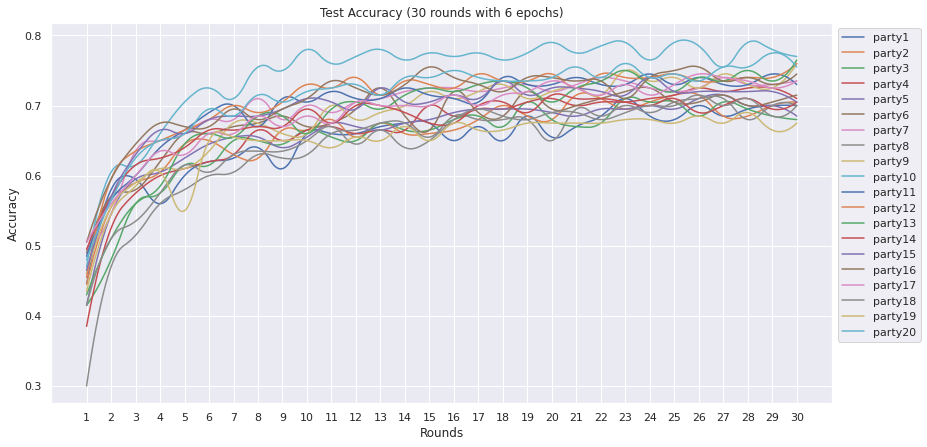

In [8]:
LIST_OF_ROUNDS = range(1, ROUNDS + 1)
f = plt.figure(figsize=(14, 7))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_ROUNDS, eval_party_acc[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Test Accuracy ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Accuracy')
plt.xlabel('Rounds')
plt.xticks(LIST_OF_ROUNDS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('test_accuracy.png', dpi=200)
plt.show()

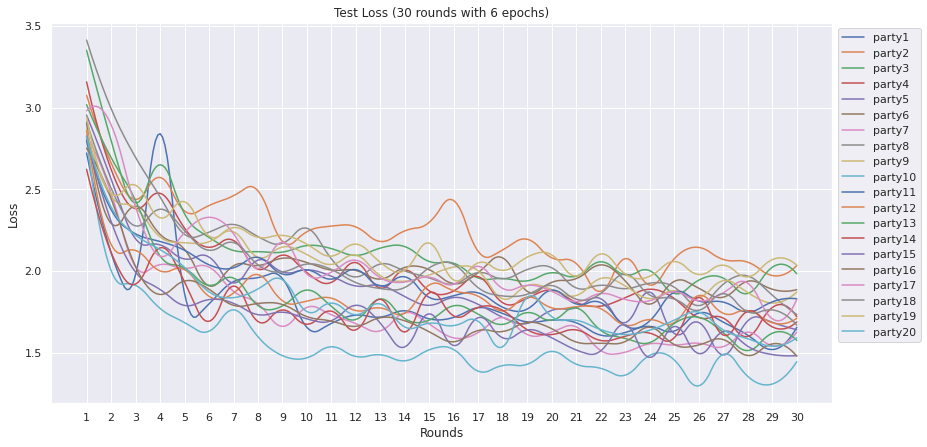

In [9]:
LIST_OF_ROUNDS = range(1, ROUNDS + 1)
f = plt.figure(figsize=(14, 7))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_ROUNDS, eval_party_loss[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Test Loss ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Loss')
plt.xlabel('Rounds')
plt.xticks(LIST_OF_ROUNDS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('test_loss.png', dpi=200)
plt.show()

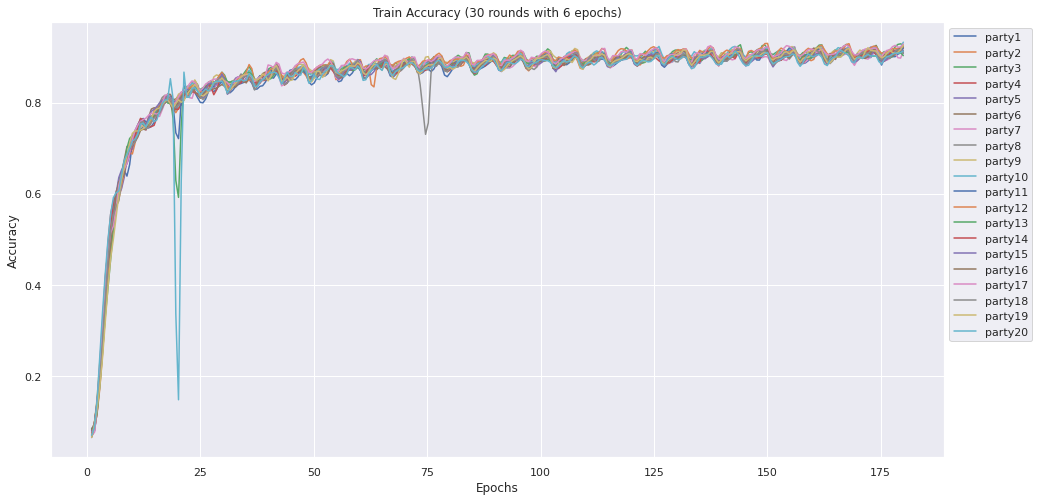

In [10]:
LIST_OF_EPOCHS = range(1, EPOCHS * ROUNDS + 1)
f = plt.figure(figsize=(16, 8))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_EPOCHS, train_party_acc[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Train Accuracy ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
# plt.xticks(LIST_OF_EPOCHS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('train_accuracy.png', dpi=200)
plt.show()

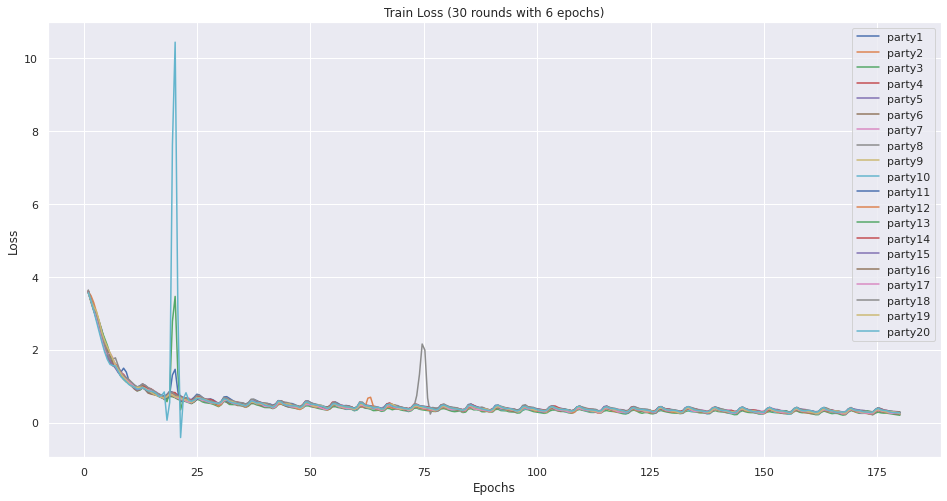

In [11]:
LIST_OF_EPOCHS = range(1, EPOCHS * ROUNDS + 1)
f = plt.figure(figsize=(16, 8))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_EPOCHS, train_party_loss[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Train Loss ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Loss')
plt.xlabel('Epochs')
# plt.xticks(LIST_OF_EPOCHS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('train_loss.png', dpi=200)
plt.show()

In [12]:
aggregator.model_synch()

2021-06-05T19:30:40.475Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating global model sync requests.
2021-06-05T19:30:40.478Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Sync Global Model<ibmfl.model.model_update.ModelUpdate object at 0x7f43392c2748>
2021-06-05T19:30:40.478Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-05T19:30:41.818Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-05T19:30:41.819Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-05T19:30:41.820Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-05T19:30:41.820Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Finished sync model requests


In [13]:
aggregator.eval_model()

2021-06-05T19:30:45.719Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating evaluation requests.
2021-06-05T19:30:45.721Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-05T19:30:47.145Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-05T19:30:47.145Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-05T19:30:47.146Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-05T19:30:47.147Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Finished evaluate model requests.
2021-06-05T19:30:47.147Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Finished eval requests


In [14]:
aggregator.save_model()

2021-06-05T19:31:15.255Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating save model request.
2021-06-05T19:31:15.256Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-05T19:31:18.370Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-05T19:31:18.371Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-05T19:31:18.371Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-05T19:31:18.372Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Finished saving the models.
2021-06-05T19:31:18.372Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Finished save requests
